<h1>Least Square regression with simulated (synthetic data) reverse procedure</h1>


In [8]:
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import normal
from sklearn.linear_model import LinearRegression


In [9]:
#visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We will be experimenting with synthetic data to develop the least square approximations on the reverse.  
Our equation of the linear model: 
<p>$$y_{i}=α + βx_{i} + ε_{i} (i=1,....,n)(1)$$</p>  

We are going to create synthetic data for a number of observations say $n$ and we will simulate our experiment to find a and b. 
<p>We choose a constant term -$a$ say $a=10$ and a slope coefficient -$b$ say, $b=1$. We will generate $n$ random disturbances $e_{1},.... e_{n}$ from a normal distribution with mean zero and variance $σ^2=25$ so, $σ=5$. </p>

In [10]:
#define our parameters a and b - sigma is the variance n is the number of observations
a=10; b=1; sigma=5; n=20

In [11]:
#define seed with 1 to make the experiment repeatable with same data
seed(1)
#Generate a sequence of n disturbances 
e = normal(loc=0, scale=1, size=n)
e

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521])

Apply a variance of 5 to disturbances 
We multiply the random normally distributed disturbances by variance sigma.  

In [12]:
EPS1=e*sigma
EPS1

array([  8.12172682,  -3.05878207,  -2.64085876,  -5.36484311,
         4.32703815, -11.50769348,   8.72405882,  -3.8060345 ,
         1.59519548,  -1.24685188,   7.31053969, -10.30070355,
        -1.61208602,  -1.92027177,   5.66884721,  -5.49945634,
        -0.86214104,  -4.38929209,   0.21106873,   2.91407607])

In [13]:
#Here we define our explained variable X of the equation 1
X=np.arange(1,n+1)

print(" The explanatory variable : " , X)

 The explanatory variable :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [14]:
#We are developing equation (1) α+βx
YSYS=a+b*X
YSYS

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30])

>Data Y, are generated with disturbances ε~$N(0, 25)$ by the equation $y_{i}=α + βx_{i} + ε_{i} (i=1,....,n)$ <br> 
with $n=20, x_{i}=i$ with $i=1,...n, α=10$ and $β=1$

In [15]:
Y=YSYS+EPS1
Y #this is our data explanatory variable 

array([19.12172682,  8.94121793, 10.35914124,  8.63515689, 19.32703815,
        4.49230652, 25.72405882, 14.1939655 , 20.59519548, 18.75314812,
       28.31053969, 11.69929645, 21.38791398, 22.07972823, 30.66884721,
       20.50054366, 26.13785896, 23.61070791, 29.21106873, 32.91407607])

In [16]:
Y[7]

X[7]

8

Now we have finished with the data generation process. Let's now display the "fitted" line and the data. 

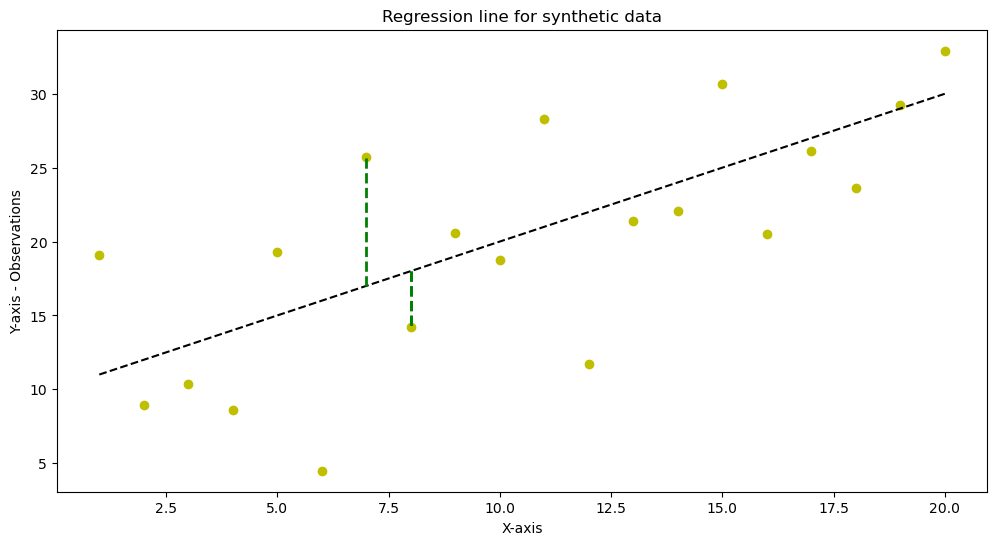

In [17]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b*X+a, '--k')
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2)
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.plot([X[6],X[6]], [17, Y[6]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.show()

Above: Scatter diagram with observed (synthetic) data $({x}_i, {y}_i)$, regression line $(y_{i}=α + βx_{i})$, and
residual $({e}_i)$.

In [18]:
t=a+b*X

In [19]:
t

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30])

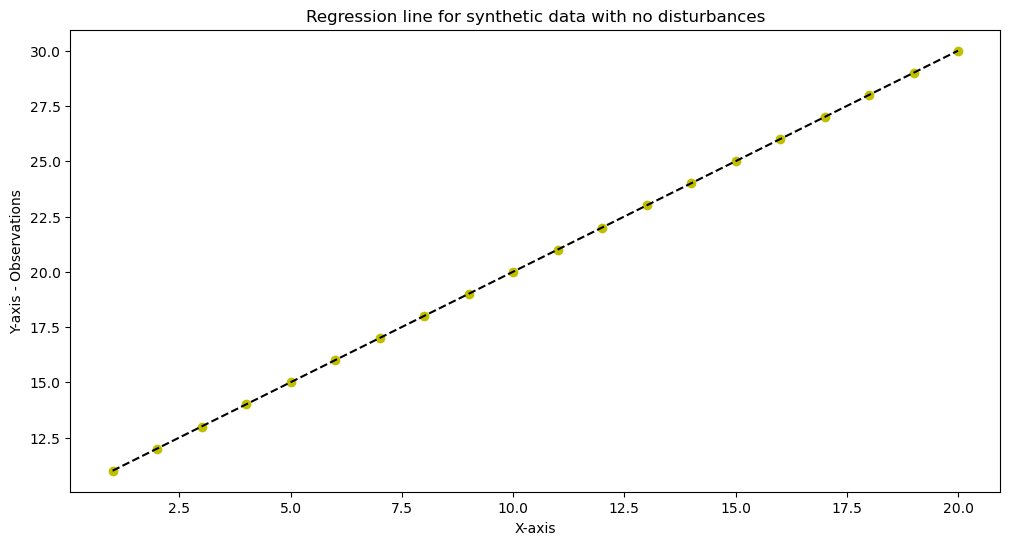

In [20]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data with no disturbances')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, t, 'yo', X, b*X+a, '--k')
plt.show()

C:\Users\ippok\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

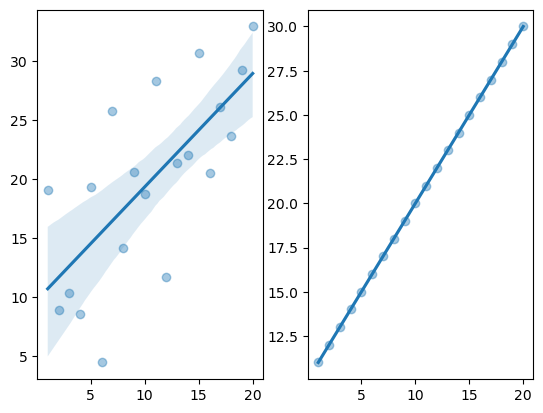

In [21]:
fig, ax = plt.subplots(1, 2)
sns.regplot(X, Y, ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot(X, t, ax=ax[1], scatter_kws={'alpha': 0.4})

<H1>The Reverse procedure</H1>

>Now we will be taking the reverse procedure to verify and confirm the parameters a and b.<br>
Suppose we are given the data X and Y above and we were asked to calculate the parameters a and b and display the fitted line. 

So, our purpose is to find a and b that minimize the square difference<br><br> 
$$S(a, b)=\sum({y}_i-a-b{x}_i^2)$$

We derive the partial derivatives with respect to a and b and equate to zero <br><br>
$$\partial S/\partial α =-2\sum({y}_i-a-b{x}_i)=0$$
$$\partial S/\partial β =-2\sum{x}_i({y}_i-a-b{x}_i)=0$$
<br>


Dividing by <b>2n</b> finally we find $$a=\hat{y}-b\hat{x}$$<br>


$$b=\frac{\sum ({x}_i-\hat{x})({y}_i-\hat{y})}{\sum ({x}_i-\hat{x})^2}$$</p>


We can further simplify our fraction for b as folows:<br>
$$\sum ({x}_i-\hat{x})({y}_i-\hat{y})=\sum ({x}_i{y}_i)-\frac{1}{n}\sum {x}_i\sum {y}_i$$
$$\sum ({x}_i-\hat{x})^2=\sum {x}_i^2-\frac{1}{n}\Biggl(\sum {x}_i\Biggr)^2$$

In [22]:
#calculate the mean for x and y 
x_mean=np.mean(X)
y_mean=np.mean(Y)

In [23]:
#Calculate Σxi and Σyi
Sx=np.sum(X)
Sy=np.sum(Y)
#Square X and Y
X_sq=X**2
Y_sq=Y**2
#Calculate Σxiyi
Sxy=np.dot(X, Y.T)

In [24]:
X_sq

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361, 400], dtype=int32)

In [32]:
Y_sq

array([ 365.64043651,   79.9453781 ,  107.3118072 ,   74.5659345 ,
        373.53440352,   20.18081783,  661.72720223,  201.46865649,
        424.16207687,  351.68056451,  801.48665727,  136.87353748,
        457.44286441,  487.51439856,  940.57818929,  420.2722905 ,
        683.18767113,  557.46552803,  853.28653656, 1083.33640345])

In [33]:
X_sum_sq=np.sum(X_sq)
Y_sum_sq=np.sum(Y_sq)

In [34]:
print (X_sum_sq)
print (Y_sum_sq)

2870
9081.661354455558


In [35]:
Sy

396.6635363539271

In [36]:
#Our nominator is
nom=Sxy-((Sx*Sy)/20)
print (nom)

637.388638050521


In [37]:
#Our dennominator is
den=X_sum_sq-(1/n)*(Sx)**2
print (den)

665.0


In [38]:
#And we finally find b
b_c=nom/den
print ("parameter b is", b_c)

parameter b is 0.9584791549631895


In [39]:
#And we find a as well
alpha=np.mean(Y)-b*np.mean(X)
print ("parameter a is", alpha)

parameter a is 9.333176817696355


So, we calculated manually the regression line parameters and found them as;
$$a +\beta x=9.333176817696355+0.9584791549631895x$$
Which is very close to our initial given values of $a=10$ and $\beta =1$

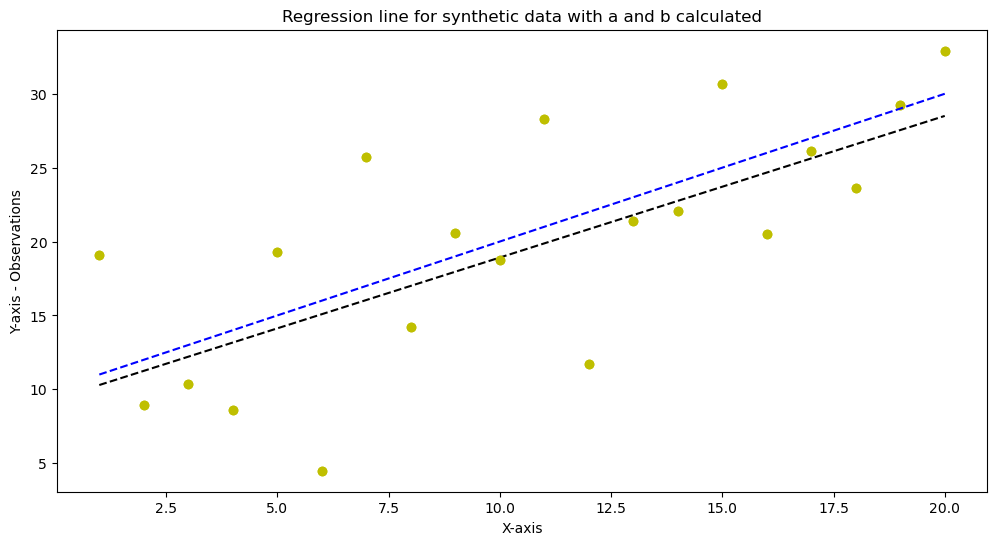

In [40]:
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data with a and b calculated')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b_c*X+alpha, '--k')
plt.plot(X, Y, 'yo', X, b*X+a, '--b')
plt.show()

In [41]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [42]:
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([9.76914569, 0.95847915])

In [43]:
results.tvalues

array([3.63152349, 4.26816199])

In [44]:
X

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.],
       [ 1., 20.]])

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     18.22
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           0.000463
Time:                        15:04:17   Log-Likelihood:                -62.451
No. Observations:                  20   AIC:                             128.9
Df Residuals:                      18   BIC:                             130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7691      2.690      3.632      0.002       4.117      15.421
x1             0.9585      0.225      4.268      0.000       0.487       1.430
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

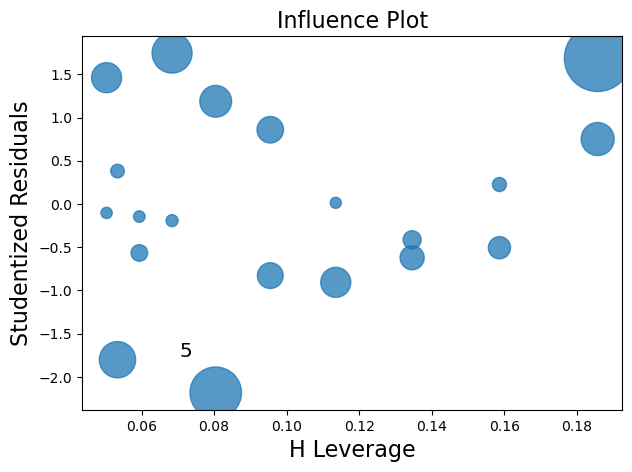

In [46]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

eval_env: 1
eval_env: 1


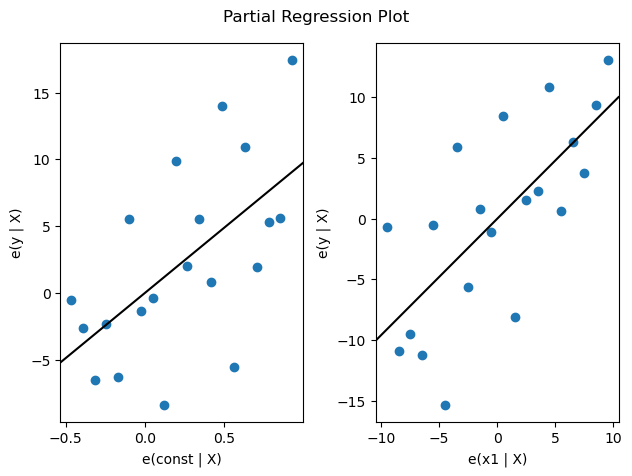

In [47]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=1.0)

In [48]:
def make_regression(var, obs, a, b):
    #define seed with 1 to make the experiment repeatable with same data
    #seed(1)
    #Generate a sequence of n disturbances 
    e = normal(loc=0, scale=1, size=obs)
    EPS1=e*var
    X=np.arange(1,obs+1)
    #We are developing equation (1) α+βx
    YSYS=a+b*X
    Y=YSYS+EPS1
    Y #this is our data explanatory variable 
    return X, Y
   

In [49]:
(X, Y)=make_regression(5, 20, 10, 1)
Y

array([ 5.49690411, 17.72361855, 17.5079536 , 16.51247169, 19.50427975,
       12.5813607 , 16.38554887, 13.32115283, 17.6605596 , 22.65177733,
       17.54169624, 20.01623237, 19.5641365 , 19.77397179, 21.64376935,
       25.93667701, 21.41344826, 29.17207849, 37.29901089, 33.7102208 ])

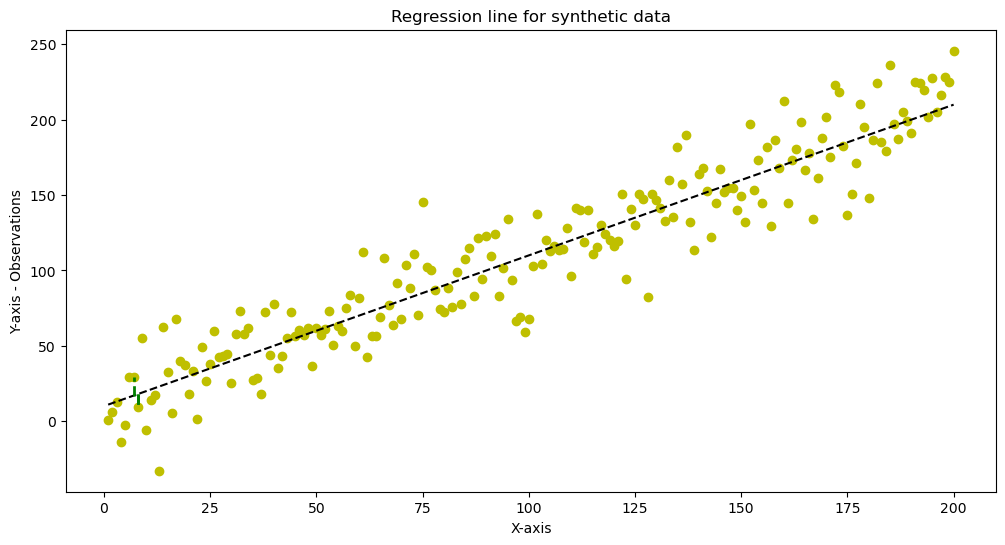

In [51]:
(X, Y)=make_regression(20, 200, 10, 1)
fig = plt.figure(figsize=(12,6))  #setting the figure size
plt.title('Regression line for synthetic data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis - Observations')
plt.plot(X, Y, 'yo', X, b*X+a, '--k')
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2)
plt.plot([X[7],X[7]], [18, Y[7]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.plot([X[6],X[6]], [17, Y[6]],color='green',linestyle='dashed',linewidth=2, label="ei")
plt.show()

In [68]:
def find_reg_params(X, Y):
    #calculate the mean for x and y 
    x_mean=np.mean(X)
    y_mean=np.mean(Y)
    #Calculate Σxi and Σyi
    Sx=np.sum(X)
    Sy=np.sum(Y)
    #Square X and Y
    X_sq=X**2
    Y_sq=Y**2
    #Calculate Σxiyi
    Sxy=np.dot(X, Y.T)
    X_sum_sq=np.sum(X_sq)
    Y_sum_sq=np.sum(Y_sq)
    #Our nominator is
    nom=Sxy-((Sx*Sy)/20)
    #print (nom)
    #Our dennominator is
    den=X_sum_sq-((1/n)*(Sx)**2)
    #print (den)
    #And we finally find b
    b_c=nom/den
    #print ("calculated parameter b is", b_c)
    #And we find a as well
    alpha=np.mean(Y)-b*np.mean(X)
    #print ("calculated parameter a is", alpha)
    return alpha, b_c

In [69]:
(X_g, Y_g)=make_regression(5, 20, 10, 1)
(a_c,b_c)=find_reg_params(X_g, Y_g)

In [70]:
a_c

10.077122034955124

In [71]:
b_c

1.164793006763332

In [72]:
a_val=np.zeros(20001)
b_val=np.zeros(20001)
for i in range(20001):
    (X_gen,Y_gen)=(Y, X)=make_regression(5, 20, 10, 1)
    (a_val[i],b_val[i]) = find_reg_params(X_gen, Y_gen)
    

In [73]:
np.mean(b_val)

1.0005473139074434

In [74]:
np.mean(a_val)

10.008965487662886